For each question:
Answer the following questions using sampling distributions

        ◦	Setup a hypothesis test writing H0 and HA
        ◦	Conduct test with a alpha of 0.05
        ◦	Show distributions in a visualization
            ▪	test for normality
            ▪	Use a legend to label distributions
        ◦	Write a conclusion
        ◦	If there is a difference in means
            ▪	Use Cohen's D to measure the effect size
            ▪	Conduct a Power Analysis
        ◦   Remember if you have multiple groups use ANOVA and Tukey Testing


## Question 2: 
## Is there a difference in number of orders and territory?

In [150]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
conn = sqlite3.connect('/Users/annadangela/FLatiron/mod02/dsc-case-study-hypothesis-testing/data/northWind.sqlite')
cur = conn.cursor()

In [3]:
def get_table_names(conn):
    res = conn.execute("""select name 
                       from sqlite_master 
                       where type='table';""").fetchall()
    return [r[0] for r in res]

get_table_names(conn)

['Employee',
 'Category',
 'Customer',
 'Shipper',
 'Supplier',
 'Order',
 'Product',
 'OrderDetail',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Region',
 'Territory',
 'EmployeeTerritory']

## Regions

In [78]:
# get order Id's with region number and territories for that region
# unable to tease out exact territory per order from data
ord_reg = pd.read_sql(''' SELECT 'Order'.Id AS Order_Id,
                TerritoryDescription, RegionId 
                FROM 'Order' JOIN(SELECT EmployeeId, TerritoryDescription, 
                RegionId FROM EmployeeTerritory JOIN
                Territory ON TerritoryId=Territory.Id)                    
                USING (EmployeeId) ORDER BY Id;''', conn)
# ord_reg['Order_Id'].nunique() #830 unique orders, Regions[1,2,3,4]
ord_reg['Count'] = 1
ord_reg.groupby('TerritoryDescription')['Count'].sum().to_frame()
# ['Count'] 10 unique values, shouldn't there be 4? per region [127, 104,  96,  67,  43,  72, 156,  42,  84, 123]

,Count
TerritoryDescription,
Atlanta,127
Beachwood,104
Bedford,96
Bellevue,67
Bloomfield Hills,43
Boston,96
Braintree,96
Cambridge,96
Campbell,72


In [76]:
ord_reg['Count'].sum() # 3960 potential territory association

3960

In [55]:
# run first
reg = pd.read_sql("""select * from Region;""", conn)
region_counts = pd.read_sql("""select count() from Territory group by RegionId""", conn)

In [56]:
regions = pd.concat([reg, region_counts], axis=1).rename(columns={"count()": "TerritoryCount"})

In [57]:
# run after employee section
regions = pd.merge(regions, emp_reg, on="Id")

In [58]:
regions = pd.merge(regions, emp_reg_list, on="Id")

In [ ]:
regions['OrderRate'] = regions['OrderCount']/sum(regions['OrderCount'])


In [63]:
regions

,Id,RegionDescription,TerritoryCount,Employee_count,EmployeeId,OrderCount,OrderRate
0,1,Eastern,19,4,"[2, 5, 1, 4]",417,0.502410
1,2,Western,15,2,"[7, 6]",139,0.167470
2,3,Northern,11,2,"[9, 8]",147,0.177108
3,4,Southern,8,1,[3],127,0.153012


In [ ]:
regions.TerritoryCount.sum() # total listed territories (see below, only 49 are staffed)

## Employee Territories

In [7]:
terr = pd.read_sql("""select * 
                        from Territory 
                        order by RegionId;""", conn).rename(columns={'Id': 'TerritoryId'}) # 53
terr

,TerritoryId,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1
5,02184,Braintree,1
6,02903,Providence,1
7,06897,Wilton,1
8,07960,Morristown,1
9,08837,Edison,1


In [32]:
test2 = terr.join(regions.set_index('RegionId'), on='EmployeeId')
test2

KeyError: "None of ['RegionId'] are in the columns"

In [10]:
# 49 unique territories repped by employees, no overlap
# employees have multiple territories each
emp_terr = pd.read_sql("""select * from EmployeeTerritory;""", conn)
emp_terr.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [11]:
emp_terr_reg = pd.merge(terr, emp_terr, on="TerritoryId", how='left')
emp_terr_reg.tail()

,TerritoryId,TerritoryDescription,RegionId,Id,EmployeeId
48,32859,Orlando,4,3/32859,3.0
49,33607,Tampa,4,3/33607,3.0
50,72716,Bentonville,4,NaN,NaN
51,75234,Dallas,4,NaN,NaN
52,78759,Austin,4,NaN,NaN


In [80]:
orders.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [12]:
###########################
# DO NOT RUN MULTIPLE TIMES
# 4 territories unassigned to staff, dropped
emp_terr_reg.dropna(axis=0, inplace=True)

In [13]:
emp_terr_reg.EmployeeId = emp_terr_reg.EmployeeId.astype('int')
emp_terr_reg.sort_values('EmployeeId').head()

,TerritoryId,TerritoryDescription,RegionId,Id,EmployeeId
7,06897,Wilton,1,1/06897,1
14,19713,Neward,1,1/19713,1
0,01581,Westboro,1,2/01581,2
1,01730,Bedford,1,2/01730,2
2,01833,Georgetow,1,2/01833,2


In [36]:
emp_terr_counts = emp_terr.groupby('EmployeeId').size().to_frame().rename(columns={0: "TerritoryCount"})
emp_terr_counts.reset_index(inplace=True)
emp_terr_counts

,EmployeeId,TerritoryCount
0,1,2
1,2,7
2,3,4
3,4,3
4,5,7
5,6,5
6,7,10
7,8,4
8,9,7


In [37]:
emp_terr_counts.TerritoryCount.sum() # check

49

In [38]:
emp_reg_list = emp_terr_reg.groupby(['RegionId']).EmployeeId.unique().apply(list).to_frame().reset_index().rename(columns={'RegionId': 'Id'})
emp_reg_list

,Id,EmployeeId
0,1,"[2, 5, 1, 4]"
1,2,"[7, 6]"
2,3,"[9, 8]"
3,4,[3]


## Employees per Region

In [17]:
emp_reg = emp_terr_reg.groupby('RegionId')['EmployeeId'].nunique().to_frame().reset_index().rename(columns={'RegionId': 'Id','EmployeeId': 'Employee_count'})
emp_reg

,Id,Employee_count
0,1,4
1,2,2
2,3,2
3,4,1


In [18]:
pd.read_sql("""select * from Employee;""", conn) # ID 1-9

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


## Orders

In [19]:
pd.read_sql("""select * from 'Order';""", conn).EmployeeId.sort_values().unique() 
# so 9/9 employees have sold at least something

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
orders = pd.read_sql("""select * from 'Order';""", conn)
orders[['Id', 'ShipCountry', 'ShipRegion']]

,Id,ShipCountry,ShipRegion
0,10248,France,Western Europe
1,10249,Germany,Western Europe
2,10250,Brazil,South America
3,10251,France,Western Europe
4,10252,Belgium,Western Europe
...,...,...,...
825,11073,Mexico,Central America
826,11074,Denmark,Northern Europe
827,11075,Switzerland,Western Europe
828,11076,France,Western Europe


In [96]:
ord_quant = pd.read_sql("""select * from OrderDetail;""", conn)
ord_quant = ord_quant.groupby(by='OrderId')[['Quantity']].agg(sum).reset_index().rename(columns={'OrderId':'Id'}) # len 830 unique orders

In [98]:
ord_quant.head()

,Id,Quantity
0,10248,27
1,10249,49
2,10250,60
3,10251,41
4,10252,105


In [239]:
ord_reg_quant = pd.merge(orders[['Id', 'ShipRegion']], ord_quant, on="Id")
ord_reg_quant.sort_values('ShipRegion').head()
#replace space with underscore
ord_reg_quant.ShipRegion = ord_reg_quant.ShipRegion.str.replace(" ", "_")
ord_reg_quant

,Id,ShipRegion,Quantity
0,10248,Western_Europe,27
1,10249,Western_Europe,49
2,10250,South_America,60
3,10251,Western_Europe,41
4,10252,Western_Europe,105
...,...,...,...
825,11073,Central_America,30
826,11074,Northern_Europe,14
827,11075,Western_Europe,42
828,11076,Western_Europe,50


In [240]:
ship_reg_quant = ord_reg_quant.groupby('ShipRegion').agg({'Id': 'nunique', 'Quantity': 'sum' }).reset_index().rename(columns={'Id': 'Num_orders', 'Quantity': 'Num_items' })
ship_reg_quant.head()

,ShipRegion,Num_orders,Num_items
0,British_Isles,75,4426
1,Central_America,28,1025
2,Eastern_Europe,7,205
3,North_America,152,11314
4,Northern_Europe,55,3405


In [24]:
orders.groupby('EmployeeId').nunique()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
EmployeeId,,,,,,,,,,,,,,
1,123,65,1,111,112,105,3,121,65,65,56,9,62,21
2,96,59,1,90,89,84,3,95,59,59,49,8,56,18
3,127,63,1,115,113,110,3,126,63,63,57,8,62,20
4,156,75,1,141,135,130,3,156,75,75,63,9,72,20
5,42,29,1,40,41,41,3,42,29,29,27,9,29,15
6,67,43,1,66,66,63,3,67,43,43,41,8,42,17
7,72,45,1,68,67,64,3,72,45,45,36,8,42,20
8,104,56,1,96,96,88,3,102,56,56,47,9,53,19
9,43,29,1,41,43,41,3,42,29,29,28,7,27,17


In [25]:
emp_ord = orders.groupby('EmployeeId').nunique().rename(columns={'Id':'Order_count', 
                                                                 'CustomerId': 'Customer_count'})[['Order_count', 'Customer_count']]
emp_ord.reset_index(inplace=True)
emp_ord


,EmployeeId,Order_count,Customer_count
0,1,123,65
1,2,96,59
2,3,127,63
3,4,156,75
4,5,42,29
5,6,67,43
6,7,72,45
7,8,104,56
8,9,43,29


## Employee Stats

In [47]:
emp_stats = emp_terr_counts.join(emp_ord.set_index('EmployeeId'), on='EmployeeId')
emp_stats

,EmployeeId,TerritoryCount,Order_count,Customer_count
0,1,2,123,65
1,2,7,96,59
2,3,4,127,63
3,4,3,156,75
4,5,7,42,29
5,6,5,67,43
6,7,10,72,45
7,8,4,104,56
8,9,7,43,29


In [50]:
#emp_stats['OrderRate'] = emp_stats['Order_Count']/sum(emp_stats['Order_Count'])

In [51]:
# order counts per region
emp_reg_list['OrderCount'] = 0
for row in emp_reg_list.index: 
     for emp in emp_reg_list['EmployeeId'][row]:
        emp_reg_list['OrderCount'][row] += emp_stats['Order_count'][emp-1]

emp_reg_list['OrderCount'].sum() == emp_stats['Order_count'].sum()

<ipython-input-51-4c87fcb71fef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_reg_list['OrderCount'][row] += emp_stats['Order_count'][emp-1]


True

In [52]:
emp_reg_list

,Id,EmployeeId,OrderCount
0,1,"[2, 5, 1, 4]",417
1,2,"[7, 6]",139
2,3,"[9, 8]",147
3,4,[3],127


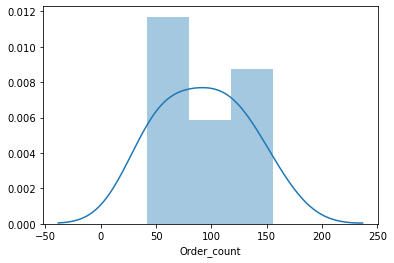

In [28]:
sns.distplot(emp_stats['Order_count'])

In [ ]:
pd.read_sql("""select * 
                from Territory T
                join EmployeeTerritory ET
                on TerritoryId
                join Employee E
                on E.Id
                join 'Order' O
                on E.Id=O.EmployeeId
                ;""", conn)

In [ ]:
pd.read_sql("""select * 
                from Employee E
                join 'Order' O
                on E.Id=O.EmployeeId
                ;""", conn)

In [ ]:
test = pd.read_sql("""select * 
                from 'Order' O
                join Employee E
                on E.Id=O.EmployeeId
                ;""", conn) # all order numbers are unique
test.head()

## ANOVA on Regional Order Rate

In [64]:
regions

,Id,RegionDescription,TerritoryCount,Employee_count,EmployeeId,OrderCount,OrderRate
0,1,Eastern,19,4,"[2, 5, 1, 4]",417,0.502410
1,2,Western,15,2,"[7, 6]",139,0.167470
2,3,Northern,11,2,"[9, 8]",147,0.177108
3,4,Southern,8,1,[3],127,0.153012


In [68]:
formula = 'OrderCount ~ C(RegionDescription)'
lm = ols(formula, regions).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal

## Tukey Test

In [65]:
multicompare = MultiComparison(regions['OrderRate'])

TypeError: __init__() missing 1 required positional argument: 'groups'

In [ ]:
tukey_hsd = multicompare.tukeyhsd(alpha=.05)

In [ ]:
simple_table = tukey_hsd.summary()

,ShipRegion,Num_orders,Num_items
0,British Isles,75,4426
1,Central America,28,1025
2,Eastern Europe,7,205
3,North America,152,11314
4,Northern Europe,55,3405
5,Scandinavia,28,1046
6,South America,145,7522
7,Southern Europe,64,2073
8,Western Europe,276,20301


In [242]:
ord_reg_quant['Quantity'].describe().transpose()['max']


346.0

In [243]:
ord_reg_quant.sort_values('ShipRegion').head().max()

Id                    10743
ShipRegion    British_Isles
Quantity                130
dtype: object

In [245]:
ord_reg_quant.loc[ord_reg_quant['ShipRegion'] == 'Eastern_Europe']

,Id,ShipRegion,Quantity
126,10374,Eastern_Europe,45
363,10611,Eastern_Europe,31
544,10792,Eastern_Europe,28
622,10870,Eastern_Europe,5
658,10906,Eastern_Europe,15
750,10998,Eastern_Europe,69
796,11044,Eastern_Europe,12


In [246]:
# create regions list with underscore
ship_regions_lst = list(ord_reg_quant['ShipRegion'].unique()) # 9 regions
ship_regions_lst

['Western_Europe',
 'South_America',
 'Central_America',
 'North_America',
 'Northern_Europe',
 'Scandinavia',
 'Southern_Europe',
 'British_Isles',
 'Eastern_Europe']

In [248]:
region_df_dict = {}
region_stats = {}
for region in ship_regions_lst:
    region_df = ord_reg_quant.loc[ord_reg_quant['ShipRegion'] == region].sort_values('Quantity')
    region_df_dict[region] = region_df
    region_stats[region] = region_df['Quantity'].describe().transpose()

In [249]:
region_stats

{'Western_Europe': count    276.000000
 mean      73.554348
 std       58.540062
 min        2.000000
 25%       31.750000
 50%       55.000000
 75%      105.000000
 max      346.000000
 Name: Quantity, dtype: float64,
 'South_America': count    145.000000
 mean      51.875862
 std       33.024377
 min        1.000000
 25%       25.000000
 50%       48.000000
 75%       75.000000
 max      164.000000
 Name: Quantity, dtype: float64,
 'Central_America': count    28.000000
 mean     36.607143
 std      20.216127
 min       6.000000
 25%      23.000000
 50%      30.000000
 75%      51.250000
 max      83.000000
 Name: Quantity, dtype: float64,
 'North_America': count    152.000000
 mean      74.434211
 std       63.182032
 min        2.000000
 25%       28.250000
 50%       59.000000
 75%      100.750000
 max      330.000000
 Name: Quantity, dtype: float64,
 'Northern_Europe': count     55.000000
 mean      61.909091
 std       36.383387
 min        5.000000
 25%       32.500000
 50%     

In [250]:
region_df_dict

{'Western_Europe':         Id      ShipRegion  Quantity
 519  10767  Western_Europe         2
 261  10509  Western_Europe         3
 490  10738  Western_Europe         3
 47   10295  Western_Europe         4
 595  10843  Western_Europe         4
 ..     ...             ...       ...
 597  10845  Western_Europe       245
 410  10658  Western_Europe       255
 742  10990  Western_Europe       256
 267  10515  Western_Europe       286
 647  10895  Western_Europe       346
 
 [276 rows x 3 columns],
 'South_America':         Id     ShipRegion  Quantity
 534  10782  South_America         1
 283  10531  South_America         2
 652  10900  South_America         3
 771  11019  South_America         5
 650  10898  South_America         5
 ..     ...            ...       ...
 213  10461  South_America       128
 237  10485  South_America       130
 791  11039  South_America       132
 638  10886  South_America       145
 124  10372  South_America       164
 
 [145 rows x 3 columns],
 'Central_A

Text(0, 0.5, 'Probability Density Function')

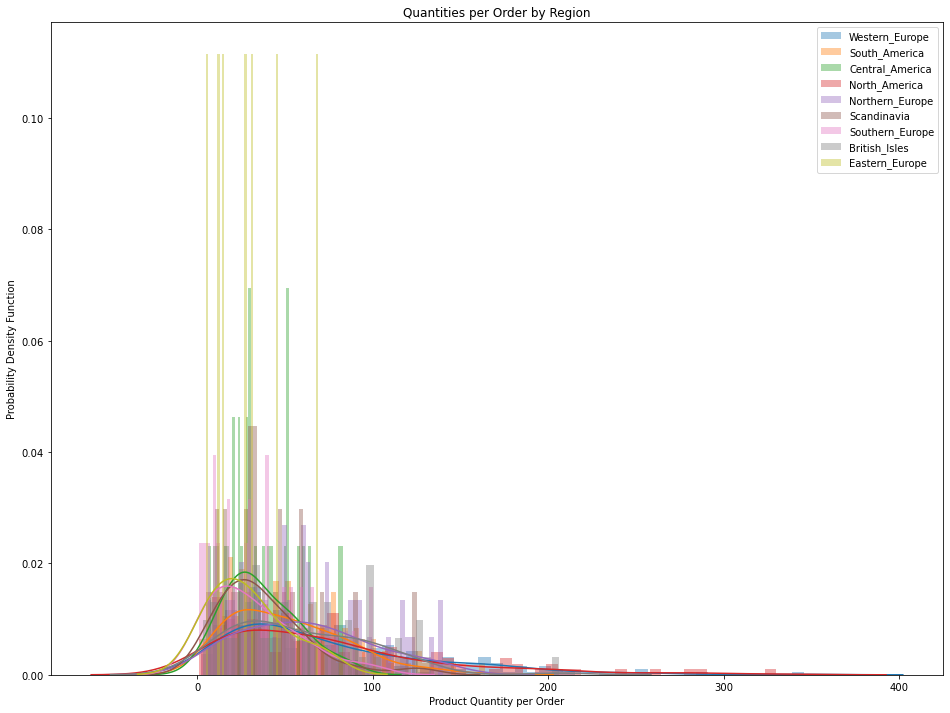

In [251]:
plt.figure(figsize=(16,12))
for region in ship_regions_lst:
    sns.distplot(region_df_dict[region][['Quantity']], bins=50, label=region)
plt.legend()
plt.title('Quantities per Order by Region')
plt.xlabel('Product Quantity per Order')
plt.ylabel('Probability Density Function')

Text(0, 0.5, 'Probability Density Function')

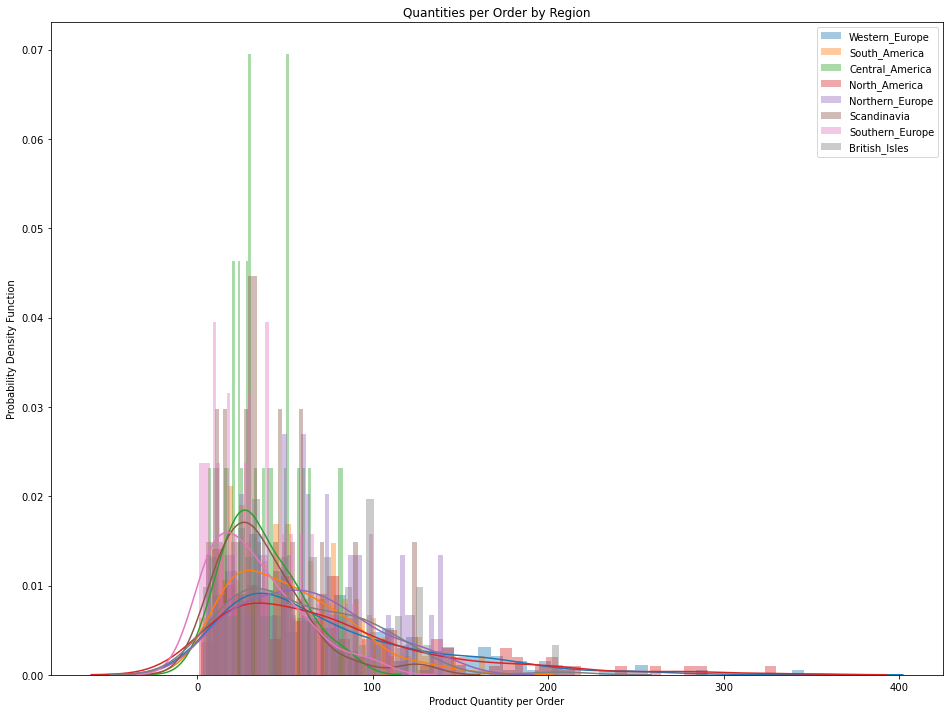

In [252]:
plt.figure(figsize=(16,12))
for region in ship_regions_lst[:8]:
    sns.distplot(region_df_dict[region][['Quantity']], bins=50, label=region)
plt.legend()
plt.title('Quantities per Order by Region')
plt.xlabel('Product Quantity per Order')
plt.ylabel('Probability Density Function')

In [ ]:
run anova
H_O : there is no difference in orders between regions
H_A : there is a difference in orders between regions
    